In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [2]:
titanic_train = pd.read_csv("train.csv")

In [3]:
titanic_train["Age"].mean()

29.69911764705882

In [4]:
new_age_var = np.where(titanic_train["Age"].isnull(),29,titanic_train["Age"])

In [5]:
titanic_train["Age"] = new_age_var

In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

In [8]:
tree_model = tree.DecisionTreeClassifier()

# Model

__DV - Survived and IDV - Age, Gender and Fair__

In [9]:
predictors = pd.DataFrame([encoded_sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [10]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

In [11]:
tree_model.fit(X=predictors, y = titanic_train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
with open("Test.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["Sex","Age","Fare"],out_file = f)

__DTree__
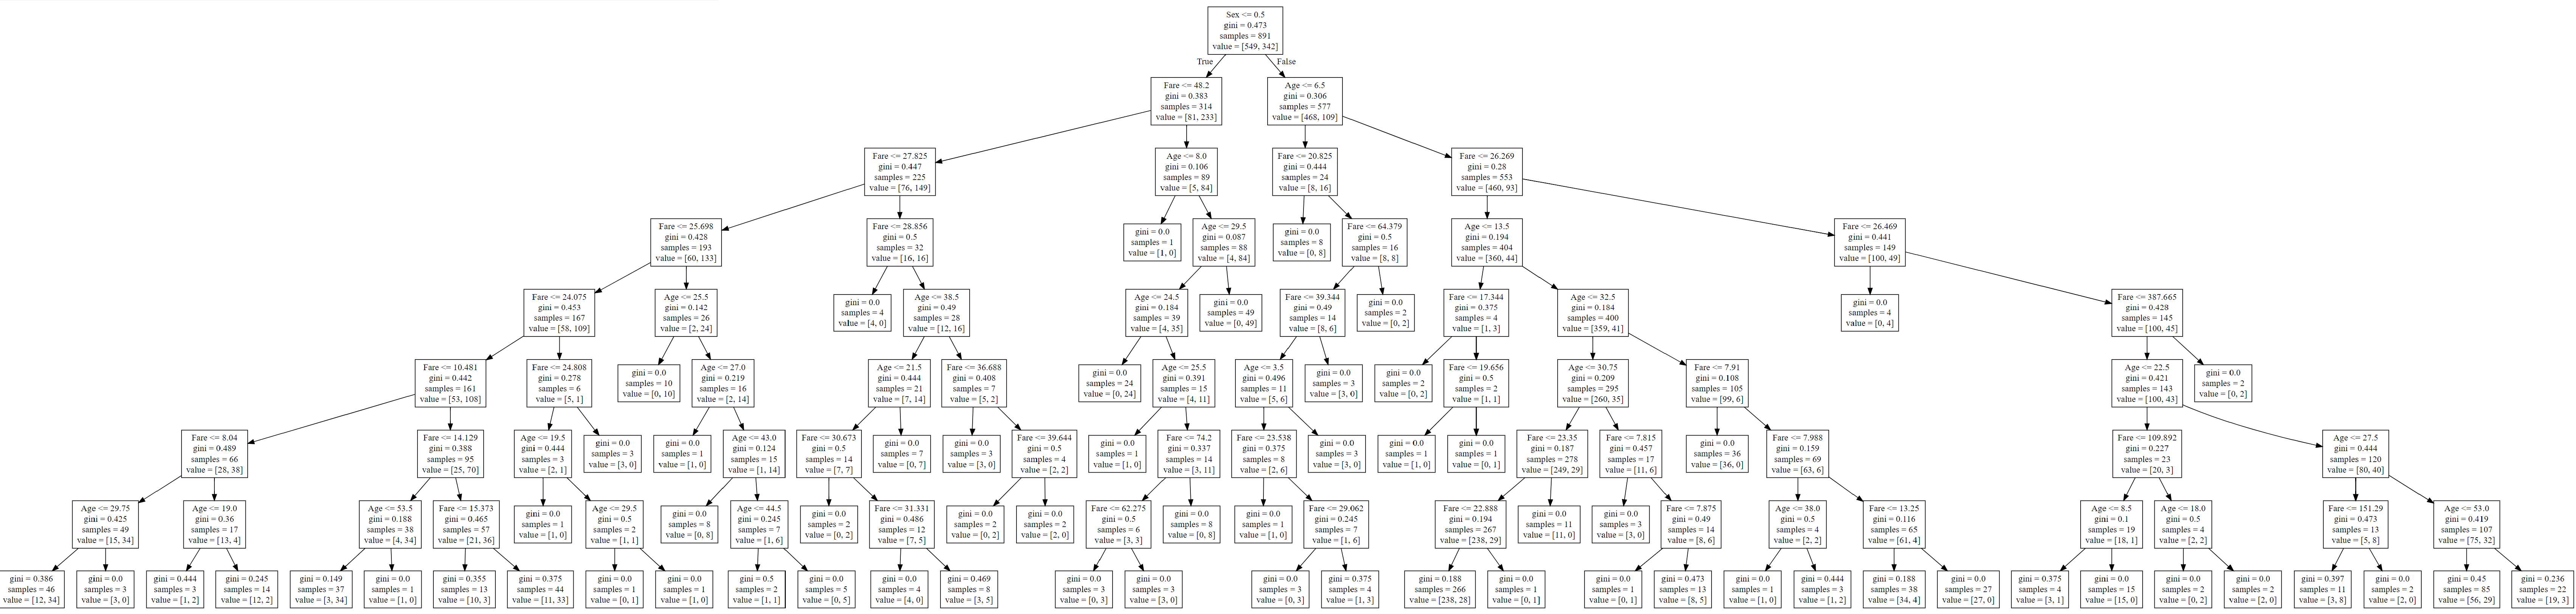

In [13]:
tree_model.score(X = predictors,y = titanic_train["Survived"])

0.8754208754208754

# Prediction

In [14]:
titanic_test = pd.read_csv("test.csv")

In [15]:
titanic_train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.560236
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [16]:
new_age_var = np.where(titanic_test["Age"].isnull(),29,titanic_test["Age"])
new_fare_var = np.where(titanic_test["Fare"].isnull(),32,titanic_test["Fare"])
#Replacing all the null values with average value of age.

In [17]:
titanic_test["Age"] = new_age_var
titanic_test["Fare"] = new_fare_var

In [18]:
encoded_sex_test = label_encoder.fit_transform(titanic_test["Sex"])

In [19]:
test_features=pd.DataFrame([encoded_sex_test,titanic_test["Age"],titanic_test["Fare"]]).T

In [20]:
test_preds = tree_model.predict(X=test_features)

In [21]:
predicted_Output = pd.DataFrame({"Passengerid":titanic_test["PassengerId"],"Survived":test_preds})

In [22]:
predicted_Output.to_csv("Result.csv",index=False)